In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd

# Load Dataset

In [23]:
earthquake_df = pd.read_csv("/content/gdrive/MyDrive/earthquake_forecasting/eq_data.csv")
df = earthquake_df.copy()

In [24]:
df.head()

,Citizen response,Citizenresp,Citizen resp,Date & Time,Latitude,Longitude,Depth,empty,Magnitude,Region
0,NaN,NaN,NaN,2023-11-21 17:43:13\n18 min ago,31.592,-104.549,3.0,NaN,2.7,WESTERN TEXAS
1,NaN,NaN,NaN,2023-11-21 17:31:49\n29 min ago,-24.200,-67.580,198.0,NaN,4.0,"SALTA, ARGENTINA"
2,NaN,NaN,NaN,2023-11-21 17:27:04\n34 min ago,31.647,-104.017,5.0,NaN,2.9,WESTERN TEXAS
3,NaN,NaN,NaN,2023-11-21 17:01:48\n59 min ago,46.345,13.601,0.0,NaN,0.8,SLOVENIA
4,NaN,NaN,NaN,2023-11-21 16:56:35\n1 hr 04 min ago,-4.320,130.810,10.0,NaN,3.3,BANDA SEA


In [25]:
df.shape

(99800, 10)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99800 entries, 0 to 99799
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Citizen response  0 non-null      float64
 1   Citizenresp       5920 non-null   float64
 2   Citizen resp      36 non-null     float64
 3   Date & Time       99800 non-null  object 
 4   Latitude          99798 non-null  float64
 5   Longitude         99798 non-null  float64
 6   Depth             99798 non-null  float64
 7   empty             0 non-null      float64
 8   Magnitude         99798 non-null  float64
 9   Region            99800 non-null  object 
dtypes: float64(8), object(2)
memory usage: 7.6+ MB


# Data Cleaning

    

*   Dropping Unnecessary Columns
*   Splitting Dates From Date & Time Column
*   Convert Date & Time Columns to Datetime





In [27]:
df = df.drop(columns=["Citizen response",
                      "Citizenresp",
                      "Citizen resp",
                      "empty"])

df.shape

(99800, 6)

In [28]:
df['Date & Time'] = df['Date & Time'].str.split('\n').str[0]

In [29]:
df.head()

,Date & Time,Latitude,Longitude,Depth,Magnitude,Region
0,2023-11-21 17:43:13,31.592,-104.549,3.0,2.7,WESTERN TEXAS
1,2023-11-21 17:31:49,-24.200,-67.580,198.0,4.0,"SALTA, ARGENTINA"
2,2023-11-21 17:27:04,31.647,-104.017,5.0,2.9,WESTERN TEXAS
3,2023-11-21 17:01:48,46.345,13.601,0.0,0.8,SLOVENIA
4,2023-11-21 16:56:35,-4.320,130.810,10.0,3.3,BANDA SEA


In [30]:
df['Date & Time'] = pd.to_datetime(df['Date & Time'])

# # Create separate columns for date and time
# df['Date'] = df['Date & Time'].dt.date
# df['Time'] = df['Date & Time'].dt.time
# df = df.drop(columns=['Date & Time'])

df.head()

,Date & Time,Latitude,Longitude,Depth,Magnitude,Region
0,2023-11-21 17:43:13,31.592,-104.549,3.0,2.7,WESTERN TEXAS
1,2023-11-21 17:31:49,-24.200,-67.580,198.0,4.0,"SALTA, ARGENTINA"
2,2023-11-21 17:27:04,31.647,-104.017,5.0,2.9,WESTERN TEXAS
3,2023-11-21 17:01:48,46.345,13.601,0.0,0.8,SLOVENIA
4,2023-11-21 16:56:35,-4.320,130.810,10.0,3.3,BANDA SEA


# Creating New Columns



*   Copying Clean DataFram
*   Split the Region Columns into 2 columns
*   Identifying and Removing Duplicate Rows
*   Finding and Filling Null Values





In [31]:
df_copy = df.copy()

In [32]:
def extract_lands_and_country(row):
    parts = row.split(' ')
    if len(parts) == 1:
        # If there is only one word, use it for both 'Lands' and 'Country'
        lands = country = parts[0]
    else:
        country = parts[-1]
        lands = ', '.join(parts[:-1])
    return pd.Series({'Lands': lands, 'Country': country})

# Apply the custom function to each row of the 'Region' column
df_copy[['Lands', 'Country']] = df_copy['Region'].apply(extract_lands_and_country)

In [46]:
df_copy = df_copy.drop(columns="Region")

In [47]:
df_copy.head()

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country
0,2023-11-21 17:43:13,31.592,-104.549,3.0,2.7,WESTERN,TEXAS
1,2023-11-21 17:31:49,-24.200,-67.580,198.0,4.0,"SALTA,",ARGENTINA
2,2023-11-21 17:27:04,31.647,-104.017,5.0,2.9,WESTERN,TEXAS
3,2023-11-21 17:01:48,46.345,13.601,0.0,0.8,SLOVENIA,SLOVENIA
4,2023-11-21 16:56:35,-4.320,130.810,10.0,3.3,BANDA,SEA


In [49]:
duplicate_rows = df_copy[df_copy.duplicated()]
df_copy = df_copy.drop_duplicates(subset=["Date & Time"])
df_copy.shape


(53539, 7)

In [50]:
df_copy.head()

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country
0,2023-11-21 17:43:13,31.592,-104.549,3.0,2.7,WESTERN,TEXAS
1,2023-11-21 17:31:49,-24.200,-67.580,198.0,4.0,"SALTA,",ARGENTINA
2,2023-11-21 17:27:04,31.647,-104.017,5.0,2.9,WESTERN,TEXAS
3,2023-11-21 17:01:48,46.345,13.601,0.0,0.8,SLOVENIA,SLOVENIA
4,2023-11-21 16:56:35,-4.320,130.810,10.0,3.3,BANDA,SEA


In [51]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53539 entries, 0 to 53699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date & Time  53539 non-null  datetime64[ns]
 1   Latitude     53539 non-null  float64       
 2   Longitude    53539 non-null  float64       
 3   Depth        53539 non-null  float64       
 4   Magnitude    53539 non-null  float64       
 5   Lands        53539 non-null  object        
 6   Country      53539 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.3+ MB


In [52]:
df_copy.head()

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country
0,2023-11-21 17:43:13,31.592,-104.549,3.0,2.7,WESTERN,TEXAS
1,2023-11-21 17:31:49,-24.200,-67.580,198.0,4.0,"SALTA,",ARGENTINA
2,2023-11-21 17:27:04,31.647,-104.017,5.0,2.9,WESTERN,TEXAS
3,2023-11-21 17:01:48,46.345,13.601,0.0,0.8,SLOVENIA,SLOVENIA
4,2023-11-21 16:56:35,-4.320,130.810,10.0,3.3,BANDA,SEA


In [53]:
df_copy.isna().sum()

Date & Time    0
Latitude       0
Longitude      0
Depth          0
Magnitude      0
Lands          0
Country        0
dtype: int64

In [54]:
df_copy.dropna(inplace=True)

In [55]:
df_copy.isna().sum()

Date & Time    0
Latitude       0
Longitude      0
Depth          0
Magnitude      0
Lands          0
Country        0
dtype: int64

In [56]:
df_copy.describe()

,Latitude,Longitude,Depth,Magnitude
count,53539.000000,53539.000000,53539.000000,53539.000000
mean,21.120630,-15.421862,35.799959,2.962569
std,25.645429,93.129891,67.580186,0.893910
min,-65.899000,-179.992000,-4.000000,-0.700000
25%,8.485000,-94.570000,6.000000,2.300000
50%,29.320000,-8.373000,10.000000,2.900000
75%,38.470000,37.460000,32.000000,3.500000
max,85.330000,180.000000,750.000000,7.700000


# Saving the Clean CSV File

In [57]:
df_copy.to_csv('output_file.csv', index=False)


In [59]:
df_copy.head()

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country
0,2023-11-21 17:43:13,31.592,-104.549,3.0,2.7,WESTERN,TEXAS
1,2023-11-21 17:31:49,-24.200,-67.580,198.0,4.0,"SALTA,",ARGENTINA
2,2023-11-21 17:27:04,31.647,-104.017,5.0,2.9,WESTERN,TEXAS
3,2023-11-21 17:01:48,46.345,13.601,0.0,0.8,SLOVENIA,SLOVENIA
4,2023-11-21 16:56:35,-4.320,130.810,10.0,3.3,BANDA,SEA


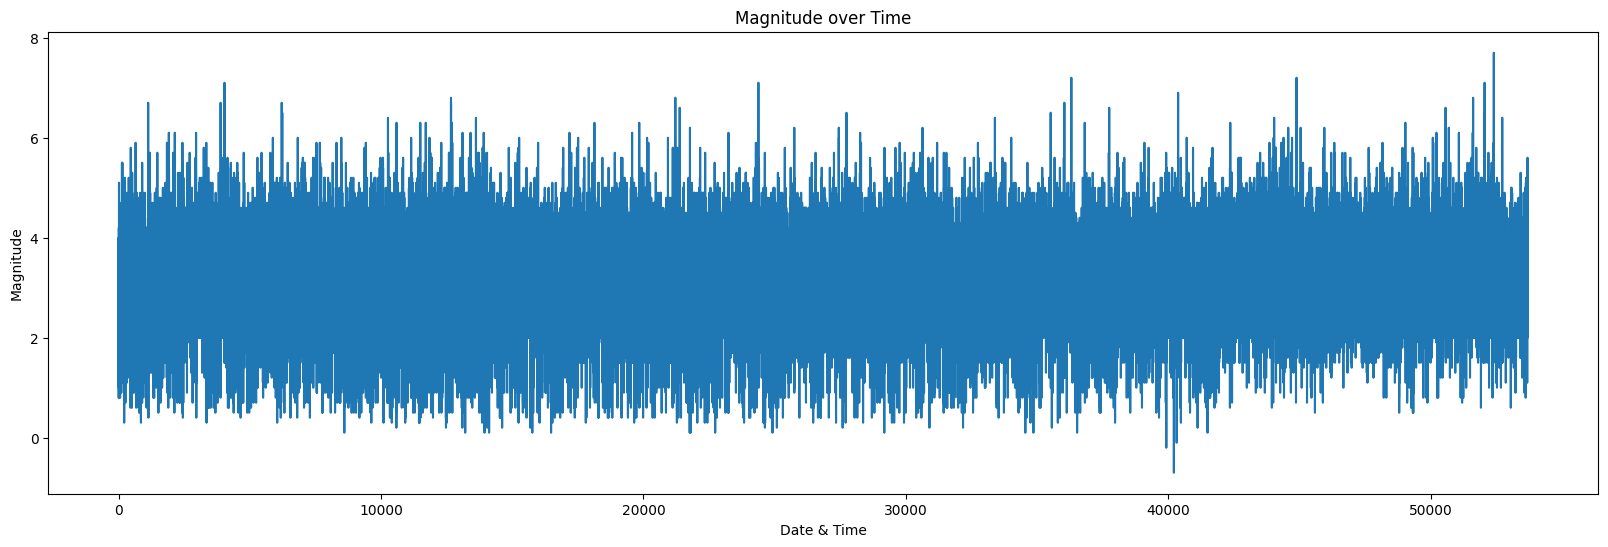

In [62]:
import matplotlib.pyplot as plt

df_copy['Magnitude'].plot(figsize=(20, 6), title='Magnitude over Time')
plt.xlabel('Date & Time')
plt.ylabel('Magnitude')
plt.show()
